In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import time
warnings.filterwarnings('ignore')

data=pd.read_csv('bank.csv')
#y=data['deposit']
#y.replace(('yes', 'no'), (1, 0), inplace=True)
#bank=data.drop('deposit', axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
#outlier analysis
from collections import Counter
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [ ]:
data.loc[detect_outliers(data,['age',
                               'day','duration','campaign','previous'])]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3945,84,retired,married,tertiary,no,4761,no,no,telephone,9,sep,1405,1,92,3,failure,yes


In [ ]:
data = data.drop([3945], axis=0)

In [ ]:
#check for missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

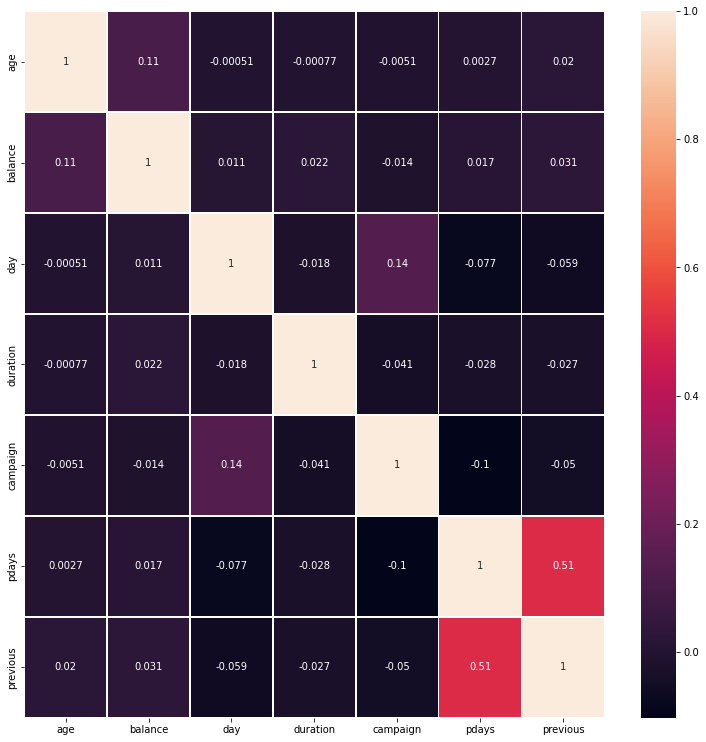

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

In [ ]:
#removing duration since it is unknown
data=data.drop(['duration'],axis=1)

In [ ]:
#one hot encoding to represent categories as binary
columns=data.select_dtypes(include=[object]).columns
data=pd.concat([data,pd.get_dummies(data[columns])],axis=1)
data=data.drop(['job','marital','education','default','housing','loan','contact','month','day','poutcome'],axis=1)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11161 entries, 0 to 11161
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  11161 non-null  int64 
 1   balance              11161 non-null  int64 
 2   campaign             11161 non-null  int64 
 3   pdays                11161 non-null  int64 
 4   previous             11161 non-null  int64 
 5   deposit              11161 non-null  object
 6   job_admin            11161 non-null  uint8 
 7   job_blue-collar      11161 non-null  uint8 
 8   job_entrepreneur     11161 non-null  uint8 
 9   job_housemaid        11161 non-null  uint8 
 10  job_management       11161 non-null  uint8 
 11  job_retired          11161 non-null  uint8 
 12  job_self-employed    11161 non-null  uint8 
 13  job_services         11161 non-null  uint8 
 14  job_student          11161 non-null  uint8 
 15  job_technician       11161 non-null  uint8 
 16  job_

,age,balance,campaign,pdays,previous,deposit,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes
0,59,2343,1,-1,0,yes,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,56,45,1,-1,0,yes,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,41,1270,1,-1,0,yes,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,55,2476,1,-1,0,yes,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,54,184,2,-1,0,yes,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [ ]:
def pdayswork(pdays):
    if(pdays == -1):
        return(0)
    elif(pdays >= 0):
        return(1)
data['pdays2'] = data['pdays'].apply(pdayswork)

In [ ]:
data=data.drop(['deposit_no', 'deposit_yes'],axis=1)

In [ ]:
def deposit1(deposit):
    if(deposit=='yes'):
        return(1)
    elif(deposit=='no'):
        return(0)
data['depositNew'] = data['deposit'].apply(deposit1)

In [ ]:
data=data.drop(['deposit'],axis=1)


In [ ]:
data.head()

,age,balance,campaign,pdays,previous,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,pdays2,depositNew
0,59,2343,1,-1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,56,45,1,-1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,41,1270,1,-1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,55,2476,1,-1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,54,184,2,-1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11161 entries, 0 to 11161
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11161 non-null  int64
 1   balance              11161 non-null  int64
 2   campaign             11161 non-null  int64
 3   pdays                11161 non-null  int64
 4   previous             11161 non-null  int64
 5   job_admin            11161 non-null  uint8
 6   job_blue-collar      11161 non-null  uint8
 7   job_entrepreneur     11161 non-null  uint8
 8   job_housemaid        11161 non-null  uint8
 9   job_management       11161 non-null  uint8
 10  job_retired          11161 non-null  uint8
 11  job_self-employed    11161 non-null  uint8
 12  job_services         11161 non-null  uint8
 13  job_student          11161 non-null  uint8
 14  job_technician       11161 non-null  uint8
 15  job_unemployed       11161 non-null  uint8
 16  job_unknown          1

In [ ]:
#data normalization
from sklearn.preprocessing import StandardScaler
X = data.iloc[:, 0:50]
Y = data.iloc[:, 50]
nd = StandardScaler()
nd.fit(X)
X =nd.transform(X)
print(X)

[[ 1.4926218   0.25261499 -0.55420079 ... -0.32579855  0.58352347
  -0.58379938]
 [ 1.24065834 -0.4598839  -0.55420079 ... -0.32579855  0.58352347
  -0.58379938]
 [-0.01915895 -0.08007052 -0.55420079 ... -0.32579855  0.58352347
  -0.58379938]
 ...
 [-0.77504932 -0.46484473 -0.18682923 ... -0.32579855  0.58352347
  -0.58379938]
 [ 0.14881669 -0.47383623 -0.18682923 ... -0.32579855 -1.71372713
   1.71291719]
 [-0.60707368 -0.47383623 -0.55420079 ... -0.32579855  0.58352347
  -0.58379938]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve
X = data.iloc[:, 0:50]
Y = data.iloc[:, 50]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

accuracies = {}
precisions= {}
recalls= {}
f1scores={}
auc_roc_scores={}
sensitivities={}
specificities={}

In [ ]:
#Logistic regression without regularization
 
# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
 
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='none')
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)


cr=classification_report(y_test,prediction, output_dict=True)
acc = accuracy_score(y_test,prediction)*100
print("Logistic Regression accuracy:",acc)
accuracies['Logistic Regression']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Logistic Regression']=f1

precision = precision_score(y_test, prediction)*100
print('Precision: ',precision)
precisions['Logistic Regression']=precision

recall = recall_score(y_test, prediction)*100
print('Recall: ',recall)
recalls['Logistic Regression']=recall

sensitivity=cr['1']['recall']*100
print('Sensitivity: ',sensitivity)
sensitivities['Logistic Regression']=sensitivity


specificity=cr['0']['recall']*100
print('Specificity: ', specificity)
specificities['Logistic Regression']=specificity

auc_roc_score = roc_auc_score(y_test, prediction)*100
print('AUC (ROC): ', auc_roc_score)
auc_roc_scores['Logistic Regression']=auc_roc_score

err=100-acc
print("Error Rate: ",err)

tpr=sensitivity
print('TPR: ', tpr)

fpr=100-specificity
print('FPR: ', fpr)


The time of execution of above program is : 1.6868114471435547 ms
Logistic Regression accuracy: 68.78638602776533
F1-Score:  67.23084156088387
Precision:  66.82242990654206
Recall:  67.64427625354777
Sensitivity:  67.64427625354777
Specificity:  69.81292517006803
AUC (ROC):  68.7286007118079
Error Rate:  31.21361397223467
TPR:  67.64427625354777
FPR:  30.187074829931973


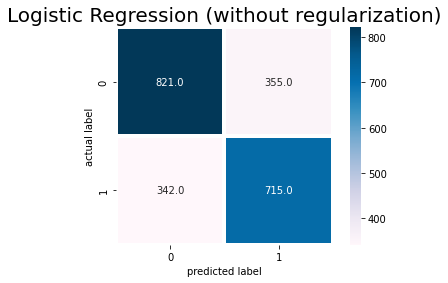

In [ ]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title("Logistic Regression (without regularization)", fontsize=20)
plt.show()

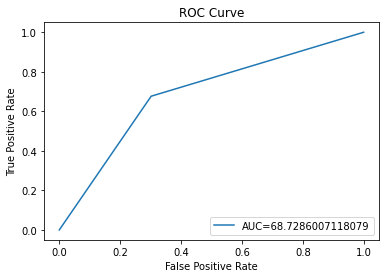

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc_roc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
#Logistic regression with regularization
 
# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
 
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")


lr=LogisticRegression(random_state=101,multi_class='ovr',solver='liblinear',class_weight='balanced',C=0.2)
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)


cr=classification_report(y_test,prediction, output_dict=True)
acc = accuracy_score(y_test,prediction)*100
print("Logistic Regression accuracy:",acc)
accuracies['Logistic Regression']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Logistic Regression']=f1

precision = precision_score(y_test, prediction)*100
print('Precision: ',precision)
precisions['Logistic Regression']=precision

recall = recall_score(y_test, prediction)*100
print('Recall: ',recall)
recalls['Logistic Regression']=recall

sensitivity=cr['1']['recall']*100
print('Sensitivity: ',sensitivity)
sensitivities['Logistic Regression']=sensitivity


specificity=cr['0']['recall']*100
print('Specificity: ', specificity)
specificities['Logistic Regression']=specificity

auc_roc_score = roc_auc_score(y_test, prediction)*100
print('AUC (ROC): ', auc_roc_score)
auc_roc_scores['Logistic Regression']=auc_roc_score

err=100-acc
print("Error Rate: ",err)

tpr=sensitivity
print('TPR: ', tpr)

fpr=100-specificity
print('FPR: ', fpr)


The time of execution of above program is : 2.0568370819091797 ms
Logistic Regression accuracy: 70.71204657411553
F1-Score:  67.36526946107784
Precision:  71.27771911298838
Recall:  63.85998107852412
Sensitivity:  63.85998107852412
Specificity:  76.87074829931973
AUC (ROC):  70.36536468892193
Error Rate:  29.287953425884467
TPR:  63.85998107852412
FPR:  23.12925170068027


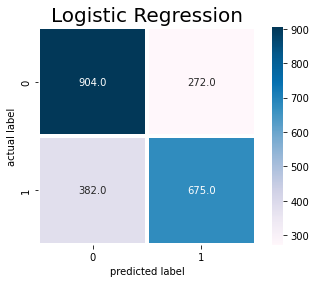

In [ ]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title("Logistic Regression", fontsize=20)
plt.show()

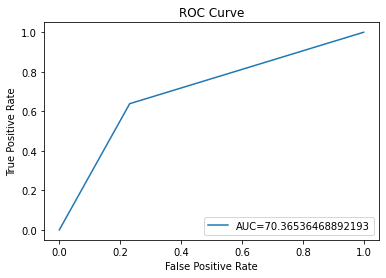

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc_roc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
#KNN

# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
 
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 4,algorithm='ball_tree')
knn.fit(X_train, y_train)
prediction=knn.predict(X_test)


cr=classification_report(y_test,prediction, output_dict=True)
acc = accuracy_score(y_test,prediction)*100
print("KNN accuracy:",acc)
accuracies['KNN']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['KNN']=f1

precision = precision_score(y_test, prediction)*100
print('Precision: ',precision)
precisions['KNN']=precision

recall = recall_score(y_test, prediction)*100
print('Recall: ',recall)
recalls['KNN']=recall

sensitivity=cr['1']['recall']*100
print('Sensitivity: ',sensitivity)
sensitivities['KNN']=sensitivity

specificity=cr['0']['recall']*100
print('Specificity: ', specificity)
specificities['KNN']=specificity

auc_roc_score = roc_auc_score(y_test, prediction)*100
print('AUC (ROC): ', auc_roc_score)
auc_roc_scores['KNN']=auc_roc_score

err=100-acc
print("Error Rate: ",err)

tpr=sensitivity
print('TPR: ', tpr)

fpr=100-specificity
print('FPR: ', fpr)

The time of execution of above program is : 1.0225772857666016 ms
KNN accuracy: 60.94939543215405
F1-Score:  49.419953596287705
Precision:  63.8680659670165
Recall:  40.30274361400189
Sensitivity:  40.30274361400189
Specificity:  79.50680272108843
AUC (ROC):  59.904773167545166
Error Rate:  39.05060456784595
TPR:  40.30274361400189
FPR:  20.493197278911566


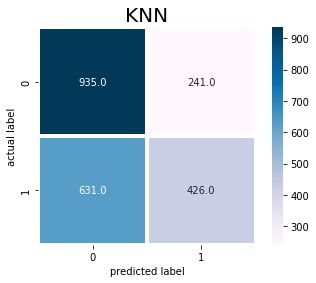

In [ ]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title("KNN", fontsize=20)
plt.show()

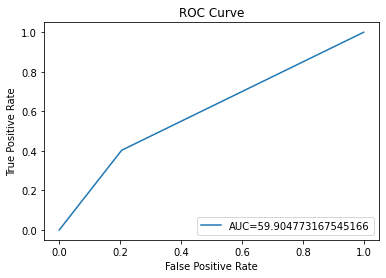

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc_roc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
#Naive Bayes

# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
 
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
naiveb=nb.predict(X_test)
prediction= nb.predict(X_test)


cr=classification_report(y_test,prediction, output_dict=True)
acc = accuracy_score(y_test,prediction)*100
print("Naive Bayes accuracy:",acc)
accuracies['Naive Bayes']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Naive Bayes']=f1

precision = precision_score(y_test, prediction)*100
print('Precision: ',precision)
precisions['Naive Bayes']=precision

recall = recall_score(y_test, prediction)*100
print('Recall: ',recall)
recalls['Naive Bayes']=recall

sensitivity=cr['1']['recall']*100
print('Sensitivity: ',sensitivity)
sensitivities['Naive Bayes']=sensitivity

specificity=cr['0']['recall']*100
print('Specificity: ', specificity)
specificities['Naive Bayes']=specificity

auc_roc_score = roc_auc_score(y_test, prediction)*100
print('AUC (ROC): ', auc_roc_score)
auc_roc_scores['Naive Bayes']=auc_roc_score

err=100-acc
print("Error Rate: ",err)

tpr=sensitivity
print('TPR: ', tpr)

fpr=100-specificity
print('FPR: ', fpr)

The time of execution of above program is : 1.4371871948242188 ms
Naive Bayes accuracy: 68.3833407971339
F1-Score:  62.08378088077337
Precision:  71.80124223602485
Recall:  54.68306527909177
Sensitivity:  54.68306527909177
Specificity:  80.69727891156462
AUC (ROC):  67.6901720953282
Error Rate:  31.616659202866103
TPR:  54.68306527909177
FPR:  19.302721088435376


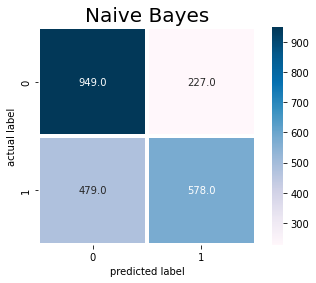

In [ ]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title("Naive Bayes", fontsize=20)
plt.show()

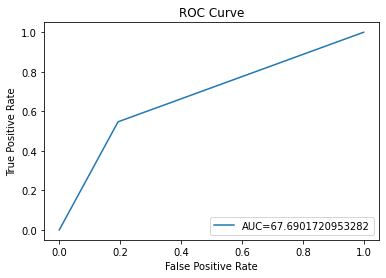

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc_roc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
#Decision Tree(gini index)

# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
 
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=100,min_samples_leaf=10)
dtree.fit(X_train, y_train)
prediction=dtree.predict(X_test)


cr=classification_report(y_test,prediction, output_dict=True)
acc = accuracy_score(y_test,prediction)*100
print("Decision Tree(gini) accuracy:",acc)
accuracies['Decision Tree(gini)']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Decision Tree(gini)']=f1

precision = precision_score(y_test, prediction)*100
print('Precision: ',precision)
precisions['Decision Tree(gini)']=precision

recall = recall_score(y_test, prediction)*100
print('Recall: ',recall)
recalls['Decision Tree(gini)']=recall

sensitivity=cr['1']['recall']*100
print('Sensitivity: ',sensitivity)
sensitivities['Decision Tree(gini)']=sensitivity

specificity=cr['0']['recall']*100
print('Specificity: ', specificity)
specificities['Decision Tree(gini)']=specificity

auc_roc_score = roc_auc_score(y_test, prediction)*100
print('AUC (ROC): ', auc_roc_score)
auc_roc_scores['Decision Tree(gini)']=auc_roc_score

err=100-acc
print("Error Rate: ",err)

tpr=sensitivity
print('TPR: ', tpr)

fpr=100-specificity
print('FPR: ', fpr)

The time of execution of above program is : 1.2104511260986328 ms
Decision Tree(gini) accuracy: 70.53291536050156
F1-Score:  62.61363636363636
Precision:  78.37837837837837
Recall:  52.1286660359508
Sensitivity:  52.1286660359508
Specificity:  87.07482993197279
AUC (ROC):  69.60174798396179
Error Rate:  29.467084639498438
TPR:  52.1286660359508
FPR:  12.925170068027214


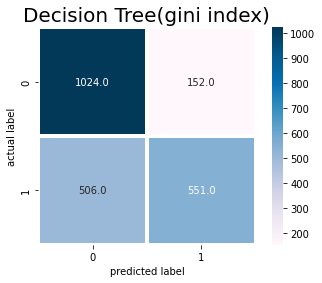

In [ ]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title("Decision Tree(gini index)", fontsize=20)
plt.show()

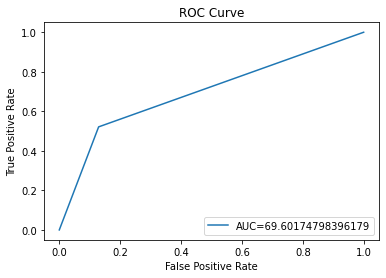

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc_roc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
#Decision Tree(information gain)

# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
 
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

dtree= DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=100,min_samples_leaf=10)
dtree.fit(X_train, y_train)
prediction=dtree.predict(X_test)


cr=classification_report(y_test,prediction, output_dict=True)
acc = accuracy_score(y_test,prediction)*100
print("Decision Tree(information gain) accuracy:",acc)
accuracies['Decision Tree(information gain)']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Decision Tree(information gain)']=f1

precision = precision_score(y_test, prediction)*100
print('Precision: ',precision)
precisions['Decision Tree(information gain)']=precision

recall = recall_score(y_test, prediction)*100
print('Recall: ',recall)
recalls['Decision Tree(information gain)']=recall

sensitivity=cr['1']['recall']*100
print('Sensitivity: ',sensitivity)
sensitivities['Decision Tree(information gain)']=sensitivity

specificity=cr['0']['recall']*100
print('Specificity: ', specificity)
specificities['Decision Tree(information gain)']=specificity

auc_roc_score = roc_auc_score(y_test, prediction)*100
print('AUC (ROC): ', auc_roc_score)
auc_roc_scores['Decision Tree(information gain)']=auc_roc_score

err=100-acc
print("Error Rate: ",err)

tpr=sensitivity
print('TPR: ', tpr)

fpr=100-specificity
print('FPR: ', fpr)

The time of execution of above program is : 1.7745494842529297 ms
Decision Tree(information gain) accuracy: 69.50291088222123
F1-Score:  63.56340288924559
Precision:  73.15270935960592
Recall:  56.19678334910123
Sensitivity:  56.19678334910123
Specificity:  81.4625850340136
AUC (ROC):  68.82968419155742
Error Rate:  30.49708911777877
TPR:  56.19678334910123
FPR:  18.5374149659864


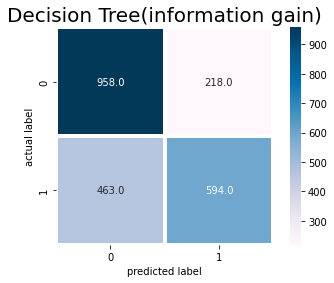

In [ ]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title("Decision Tree(information gain)", fontsize=20)
plt.show()

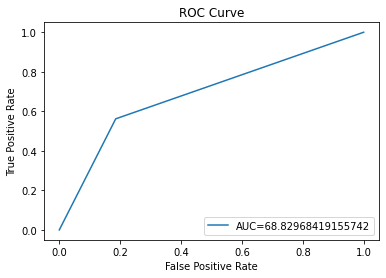

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc_roc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
#Random Forest

# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
 
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=12,
                             random_state=50)

clf.fit(X_train,y_train)

prediction = clf.predict(X_test)


cr=classification_report(y_test,prediction, output_dict=True)
acc = accuracy_score(y_test,prediction)*100
print("Random Forest accuracy:",acc)
accuracies['Random Forest']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Random Forest']=f1

precision = precision_score(y_test, prediction)*100
print('Precision: ',precision)
precisions['Random Forest']=precision

recall = recall_score(y_test, prediction)*100
print('Recall: ',recall)
recalls['Random Forest']=recall

sensitivity=cr['1']['recall']*100
print('Sensitivity: ',sensitivity)
sensitivities['Random Forest']=sensitivity

specificity=cr['0']['recall']*100
print('Specificity: ', specificity)
specificities['Random Forest']=specificity

auc_roc_score = roc_auc_score(y_test, prediction)*100
print('AUC (ROC): ', auc_roc_score)
auc_roc_scores['Random Forest']=auc_roc_score

err=100-acc
print("Error Rate: ",err)

tpr=sensitivity
print('TPR: ', tpr)

fpr=100-specificity
print('FPR: ', fpr)

The time of execution of above program is : 1.9636154174804688 ms
Random Forest accuracy: 72.05553067622034
F1-Score:  66.5236051502146
Precision:  76.82775712515489
Recall:  58.6565752128666
Sensitivity:  58.6565752128666
Specificity:  84.0986394557823
AUC (ROC):  71.37760733432445
Error Rate:  27.944469323779657
TPR:  58.6565752128666
FPR:  15.901360544217695


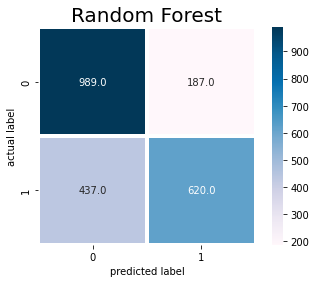

In [ ]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title("Random Forest", fontsize=20)
plt.show()

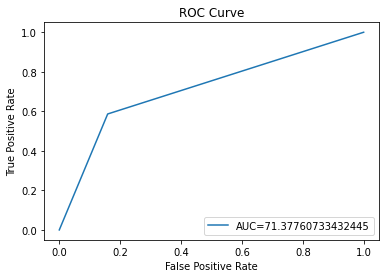

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc_roc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
#Gradient Boosting Classifier

# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
 
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.8,
    max_depth=2, random_state=0)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

cr=classification_report(y_test,prediction, output_dict=True)
acc = accuracy_score(y_test,prediction)*100
print("Gradient Boosting accuracy:",acc)
accuracies['Gradient Boosting']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Gradient Boosting']=f1

precision = precision_score(y_test, prediction)*100
print('Precision: ',precision)
precisions['Gradient Boosting']=precision

recall = recall_score(y_test, prediction)*100
print('Recall: ',recall)
recalls['Gradient Boosting']=recall

sensitivity=cr['1']['recall']*100
print('Sensitivity: ',sensitivity)
sensitivities['Gradient Boosting']=sensitivity

specificity=cr['0']['recall']*100
print('Specificity: ', specificity)
specificities['Gradient Boosting']=specificity

auc_roc_score = roc_auc_score(y_test, prediction)*100
print('AUC (ROC): ', auc_roc_score)
auc_roc_scores['Gradient Boosting']=auc_roc_score

err=100-acc
print("Error Rate: ",err)

tpr=sensitivity
print('TPR: ', tpr)

fpr=100-specificity
print('FPR: ', fpr)

The time of execution of above program is : 1.1234283447265625 ms
Gradient Boosting accuracy: 70.98074339453649
F1-Score:  66.14420062695925
Precision:  73.86231038506418
Recall:  59.88647114474929
Sensitivity:  59.88647114474929
Specificity:  80.95238095238095
AUC (ROC):  70.41942604856511
Error Rate:  29.01925660546351
TPR:  59.88647114474929
FPR:  19.04761904761905


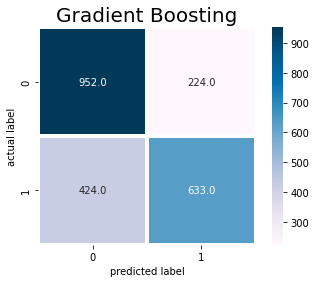

In [ ]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title("Gradient Boosting", fontsize=20)
plt.show()

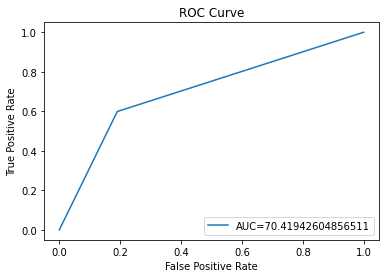

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc_roc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
#Xgboost Classifier

# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
 
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

from xgboost import XGBClassifier
xgb =XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.78,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)
prediction = xgb.predict(X_test)

cr=classification_report(y_test,prediction, output_dict=True)
acc = accuracy_score(y_test,prediction)*100
print("Xgboost Classifier accuracy:",acc)
accuracies['Xgboost Classifier']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Xgboost Classifier']=f1

precision = precision_score(y_test, prediction)*100
print('Precision: ',precision)
precisions['Xgboost Classifier']=precision

recall = recall_score(y_test, prediction)*100
print('Recall: ',recall)
recalls['Xgboost Classifier']=recall

sensitivity=cr['1']['recall']*100
print('Sensitivity: ',sensitivity)
sensitivities['Xgboost Classifier']=sensitivity

specificity=cr['0']['recall']*100
print('Specificity: ', specificity)
specificities['Xgboost Classifier']=specificity

auc_roc_score = roc_auc_score(y_test, prediction)*100
print('AUC (ROC): ', auc_roc_score)
auc_roc_scores['Xgboost Classifier']=auc_roc_score

err=100-acc
print("Error Rate: ",err)

tpr=sensitivity
print('TPR: ', tpr)

fpr=100-specificity
print('FPR: ', fpr)

The time of execution of above program is : 1.8002986907958984 ms
Xgboost Classifier accuracy: 72.50335871025526
F1-Score:  67.5475687103594
Precision:  76.52694610778443
Recall:  60.45411542100284
Sensitivity:  60.45411542100284
Specificity:  83.33333333333334
AUC (ROC):  71.8937243771681
Error Rate:  27.496641289744744
TPR:  60.45411542100284
FPR:  16.666666666666657


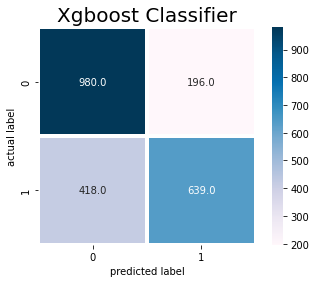

In [ ]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title("Xgboost Classifier", fontsize=20)
plt.show()

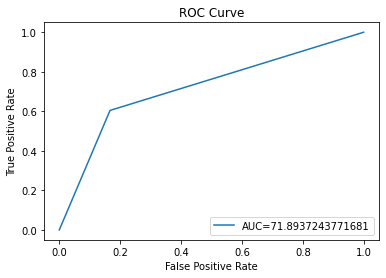

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc_roc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
#Linear SVM

# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
 
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")


from sklearn.svm import LinearSVC
svc= LinearSVC()
svc.fit(X_train,y_train)
prediction = svc.predict(X_test)

cr=classification_report(y_test,prediction, output_dict=True)
acc = accuracy_score(y_test,prediction)*100
print("Linear SVM accuracy:",acc)
accuracies['Linear SVM']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Linear SVM']=f1

precision = precision_score(y_test, prediction)*100
print('Precision: ',precision)
precisions['Linear SVM']=precision

recall = recall_score(y_test, prediction)*100
print('Recall: ',recall)
recalls['Linear SVM']=recall

sensitivity=cr['1']['recall']*100
print('Sensitivity: ',sensitivity)
sensitivities['Linear SVM']=sensitivity

specificity=cr['0']['recall']*100
print('Specificity: ', specificity)
specificities['Linear SVM']=specificity

auc_roc_score = roc_auc_score(y_test, prediction)*100
print('AUC (ROC): ', auc_roc_score)
auc_roc_scores['Linear SVM']=auc_roc_score

err=100-acc
print("Error Rate: ",err)

tpr=sensitivity
print('TPR: ', tpr)

fpr=100-specificity
print('FPR: ', fpr)

The time of execution of above program is : 2.346515655517578 ms
Linear SVM accuracy: 54.59023734885804
F1-Score:  11.518324607329843
Precision:  74.15730337078652
Recall:  6.244087038789026
Sensitivity:  6.244087038789026
Specificity:  98.04421768707483
AUC (ROC):  52.144152362931926
Error Rate:  45.40976265114196
TPR:  6.244087038789026
FPR:  1.955782312925166


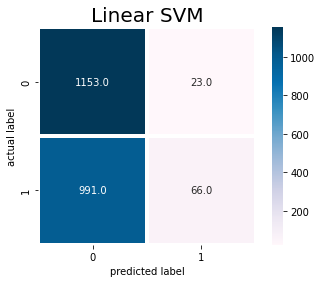

In [ ]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title("Linear SVM", fontsize=20)
plt.show()

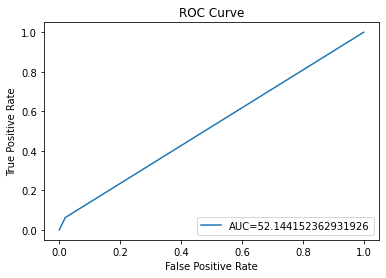

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc_roc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
#RBF SVM

# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
 
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")


from sklearn.svm import SVC
svc= SVC(kernel = 'rbf')
svc.fit(X_train,y_train)
prediction = svc.predict(X_test)

cr=classification_report(y_test,prediction, output_dict=True)
acc = accuracy_score(y_test,prediction)*100
print("RBF SVM accuracy:",acc)
accuracies['RBF SVM']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['RBF SVM']=f1

precision = precision_score(y_test, prediction)*100
print('Precision: ',precision)
precisions['RBF SVM']=precision

recall = recall_score(y_test, prediction)*100
print('Recall: ',recall)
recalls['RBF SVM']=recall

sensitivity=cr['1']['recall']*100
print('Sensitivity: ',sensitivity)
sensitivities['RBF SVM']=sensitivity

specificity=cr['0']['recall']*100
print('Specificity: ', specificity)
specificities['RBF SVM']=specificity

auc_roc_score = roc_auc_score(y_test, prediction)*100
print('AUC (ROC): ', auc_roc_score)
auc_roc_scores['RBF SVM']=auc_roc_score

err=100-acc
print("Error Rate: ",err)

tpr=sensitivity
print('TPR: ', tpr)

fpr=100-specificity
print('FPR: ', fpr)

The time of execution of above program is : 2.009153366088867 ms
RBF SVM accuracy: 56.47111509180475
F1-Score:  44.457142857142856
Precision:  56.132756132756136
Recall:  36.80227057710501
Sensitivity:  36.80227057710501
Specificity:  74.14965986394559
AUC (ROC):  55.47596522052529
Error Rate:  43.52888490819525
TPR:  36.80227057710501
FPR:  25.850340136054413


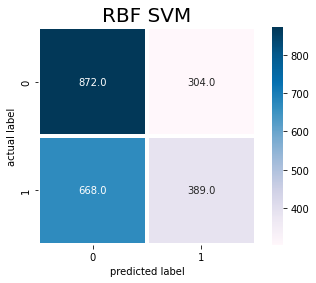

In [ ]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title("RBF SVM", fontsize=20)
plt.show()

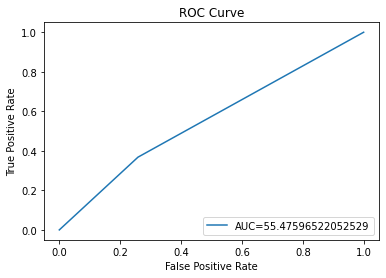

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc_roc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
#Ada Boost

# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
 
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")


from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
prediction = ada.predict(X_test)


cr=classification_report(y_test,prediction, output_dict=True)
acc = accuracy_score(y_test,prediction)*100
print("ADA Boost accuracy:",acc)
accuracies['ADA Boost']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['ADA Boost']=f1

precision = precision_score(y_test, prediction)*100
print('Precision: ',precision)
precisions['ADA Boost']=precision

recall = recall_score(y_test, prediction)*100
print('Recall: ',recall)
recalls['ADA Boost']=recall

sensitivity=cr['1']['recall']*100
print('Sensitivity: ',sensitivity)
sensitivities['ADA Boost']=sensitivity

specificity=cr['0']['recall']*100
print('Specificity: ', specificity)
specificities['ADA Boost']=specificity

auc_roc_score = roc_auc_score(y_test, prediction)*100
print('AUC (ROC): ', auc_roc_score)
auc_roc_scores['ADA Boost']=auc_roc_score

err=100-acc
print("Error Rate: ",err)

tpr=sensitivity
print('TPR: ', tpr)

fpr=100-specificity
print('FPR: ', fpr)

The time of execution of above program is : 1.5513896942138672 ms
ADA Boost accuracy: 71.69726824899239
F1-Score:  66.77181913774974
Precision:  75.14792899408283
Recall:  60.07568590350048
Sensitivity:  60.07568590350048
Specificity:  82.14285714285714
AUC (ROC):  71.1092715231788
Error Rate:  28.302731751007613
TPR:  60.07568590350048
FPR:  17.85714285714286


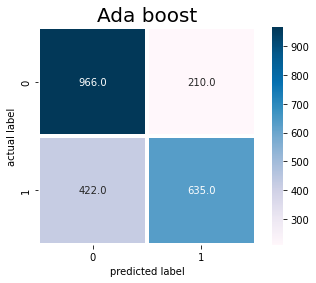

In [ ]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title("Ada boost", fontsize=20)
plt.show()

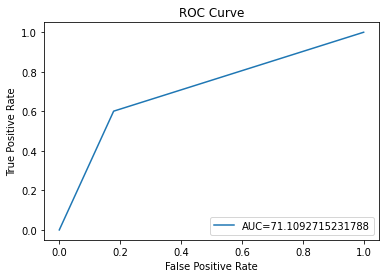

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc_roc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
#MLP Classifier

# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
 
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")


from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(X_train,y_train)
prediction = mlp.predict(X_test)


cr=classification_report(y_test,prediction, output_dict=True)
acc = accuracy_score(y_test,prediction)*100
print("MLP Classifier accuracy:",acc)
accuracies['MLP Classifier']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['MLP Classifier']=f1

precision = precision_score(y_test, prediction)*100
print('Precision: ',precision)
precisions['MLP Classifier']=precision

recall = recall_score(y_test, prediction)*100
print('Recall: ',recall)
recalls['MLP Classifier']=recall

sensitivity=cr['1']['recall']*100
print('Sensitivity: ',sensitivity)
sensitivities['MLP Classifier']=sensitivity

specificity=cr['0']['recall']*100
print('Specificity: ', specificity)
specificities['MLP Classifier']=specificity

auc_roc_score = roc_auc_score(y_test, prediction)*100
print('AUC (ROC): ', auc_roc_score)
auc_roc_scores['MLP Classifier']=auc_roc_score

err=100-acc
print("Error Rate: ",err)

tpr=sensitivity
print('TPR: ', tpr)

fpr=100-specificity
print('FPR: ', fpr)

The time of execution of above program is : 1.7328262329101562 ms
MLP Classifier accuracy: 64.84549932825794
F1-Score:  49.84025559105431
Precision:  76.77165354330708
Recall:  36.89687795648061
Sensitivity:  36.89687795648061
Specificity:  89.96598639455783
AUC (ROC):  63.431432175519205
Error Rate:  35.154500671742056
TPR:  36.89687795648061
FPR:  10.03401360544217


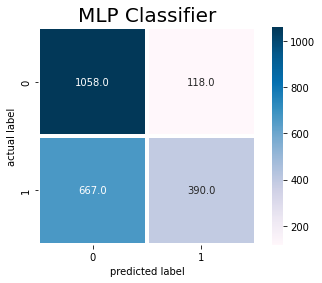

In [ ]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title("MLP Classifier", fontsize=20)
plt.show()

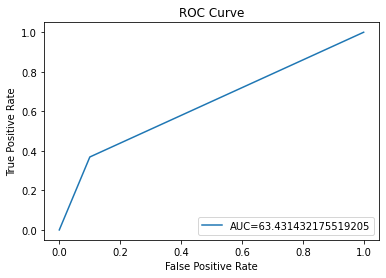

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc_roc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
#Quadratic Discriminant Analysis

# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
 
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")


from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)
prediction = qda.predict(X_test)


cr=classification_report(y_test,prediction, output_dict=True)
acc = accuracy_score(y_test,prediction)*100
print("Quadratic Discriminant accuracy:",acc)
accuracies['Quadratic Discriminant']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Quadratic Discriminant']=f1

precision = precision_score(y_test, prediction)*100
print('Precision: ',precision)
precisions['Quadratic Discriminant']=precision

recall = recall_score(y_test, prediction)*100
print('Recall: ',recall)
recalls['Quadratic Discriminant']=recall

sensitivity=cr['1']['recall']*100
print('Sensitivity: ',sensitivity)
sensitivities['Quadratic Discriminant']=sensitivity

specificity=cr['0']['recall']*100
print('Specificity: ', specificity)
specificities['Quadratic Discriminant']=specificity

auc_roc_score = roc_auc_score(y_test, prediction)*100
print('AUC (ROC): ', auc_roc_score)
auc_roc_scores['Quadratic Discriminant']=auc_roc_score

err=100-acc
print("Error Rate: ",err)

tpr=sensitivity
print('TPR: ', tpr)

fpr=100-specificity
print('FPR: ', fpr)

The time of execution of above program is : 2.0856857299804688 ms
Quadratic Discriminant accuracy: 64.26332288401254
F1-Score:  44.19580419580419
Precision:  84.71849865951742
Recall:  29.89593188268685
Sensitivity:  29.89593188268685
Specificity:  95.1530612244898
AUC (ROC):  62.52449655358833
Error Rate:  35.73667711598746
TPR:  29.89593188268685
FPR:  4.846938775510196


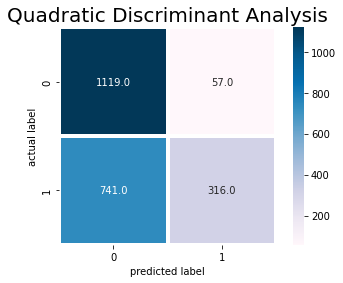

In [ ]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title("Quadratic Discriminant Analysis", fontsize=20)
plt.show()

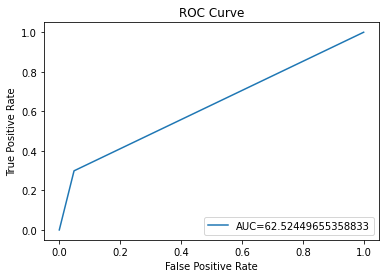

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc_roc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
#Light Gradient Boosting Machine

# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
 
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)
prediction = lgbm.predict(X_test)


cr=classification_report(y_test,prediction, output_dict=True)
acc = accuracy_score(y_test,prediction)*100
print("Light GBM accuracy:",acc)
accuracies['Light GBM']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Light GBM']=f1

precision = precision_score(y_test, prediction)*100
print('Precision: ',precision)
precisions['Light GBM']=precision

recall = recall_score(y_test, prediction)*100
print('Recall: ',recall)
recalls['Light GBM']=recall

sensitivity=cr['1']['recall']*100
print('Sensitivity: ',sensitivity)
sensitivities['Light GBM']=sensitivity

specificity=cr['0']['recall']*100
print('Specificity: ', specificity)
specificities['Light GBM']=specificity

auc_roc_score = roc_auc_score(y_test, prediction)*100
print('AUC (ROC): ', auc_roc_score)
auc_roc_scores['Light GBM']=auc_roc_score

err=100-acc
print("Error Rate: ",err)

tpr=sensitivity
print('TPR: ', tpr)

fpr=100-specificity
print('FPR: ', fpr)

The time of execution of above program is : 1.9519329071044922 ms
Light GBM accuracy: 72.50335871025526
F1-Score:  67.34042553191489
Precision:  76.91373025516404
Recall:  59.88647114474929
Sensitivity:  59.88647114474929
Specificity:  83.84353741496598
AUC (ROC):  71.86500427985763
Error Rate:  27.496641289744744
TPR:  59.88647114474929
FPR:  16.15646258503402


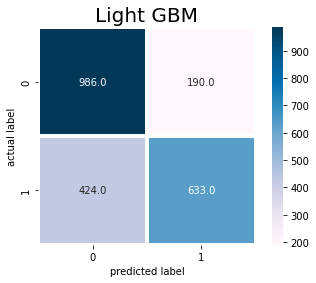

In [ ]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title("Light GBM", fontsize=20)
plt.show()

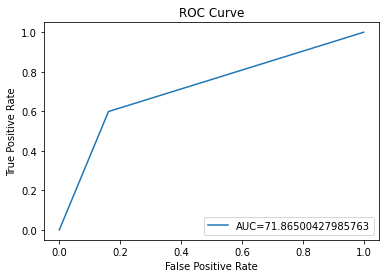

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc_roc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
#Extra Tree Classifier

# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
 
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")


from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(X_train,y_train)
prediction = etc.predict(X_test)


cr=classification_report(y_test,prediction, output_dict=True)
acc = accuracy_score(y_test,prediction)*100
print("Extra Tree Classifier accuracy:",acc)
accuracies['Extra Tree Classifier']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Extra Tree Classifier']=f1

precision = precision_score(y_test, prediction)*100
print('Precision: ',precision)
precisions['Extra Tree Classifier']=precision

recall = recall_score(y_test, prediction)*100
print('Recall: ',recall)
recalls['Extra Tree Classifier']=recall

sensitivity=cr['1']['recall']*100
print('Sensitivity: ',sensitivity)
sensitivities['Extra Tree Classifier']=sensitivity

specificity=cr['0']['recall']*100
print('Specificity: ', specificity)
specificities['Extra Tree Classifier']=specificity

auc_roc_score = roc_auc_score(y_test, prediction)*100
print('AUC (ROC): ', auc_roc_score)
auc_roc_scores['Extra Tree Classifier']=auc_roc_score

err=100-acc
print("Error Rate: ",err)

tpr=sensitivity
print('TPR: ', tpr)

fpr=100-specificity
print('FPR: ', fpr)

The time of execution of above program is : 1.6269683837890625 ms
Extra Tree Classifier accuracy: 67.57725033587103
F1-Score:  64.5445641527914
Precision:  66.90355329949239
Recall:  62.34626300851467
Sensitivity:  62.34626300851467
Specificity:  72.27891156462584
AUC (ROC):  67.31258728657026
Error Rate:  32.42274966412897
TPR:  62.34626300851467
FPR:  27.721088435374156


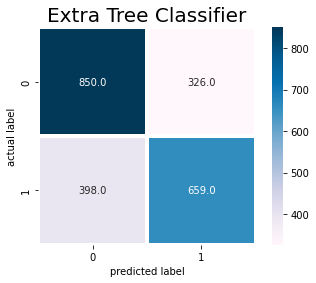

In [ ]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title("Extra Tree Classifier", fontsize=20)
plt.show()

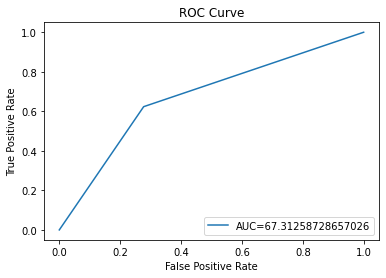

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc_roc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()